In [1]:
!python ../src/utils.py

In [2]:
%reload_ext autoreload

In [3]:
import os
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt
import utils 
import array
from ROOT import VecOps
from analysis import (df, df_filtered, COLOR_MAP)


name_tag = str(utils.TAG)
print("cwd:", os.getcwd())

cwd: /home/bothsides/projects/optimizing_DEDx_estimator/notebooks


In [4]:
f = rt.TFile(f"{utils.OUTPUT_ROOT}/2025-06-23_histos.root") #opens up the root file for reading

!rootls -t ../output/root/2025-06-23_histos.root

TCanvas  Jun 23 11:01 2025 h2_canvas_overlay;1             "Log-scale overlay" 
TCanvas  Jun 23 11:02 2025 h2_filtered_canvas_overlay;1    "Log-scale overlay" 
THStack  Jun 23 11:02 2025 h2_filtered_overlay;1           "Generalized harmonic mean (HLT_Mu50 with Isotrack_pt>55)" 
THStack  Jun 23 11:01 2025 h2_overlay;1                    "Generalized harmonic means" 
THStack  Jun 23 11:08 2025 Trunc_filtered_overlay;1        "Truncated mean (HLT_Mu50 with Isotrack_pt>55)" 
TCanvas  Jun 23 11:08 2025 Trunc_filtered_overlay_canvas;1 "Log-scale overlay" 
THStack  Jun 23 11:07 2025 Trunc_overlay;1                 "Truncated mean" 
TCanvas  Jun 23 11:07 2025 Trunc_overlay_canvas;1          "Log-scale overlay" 


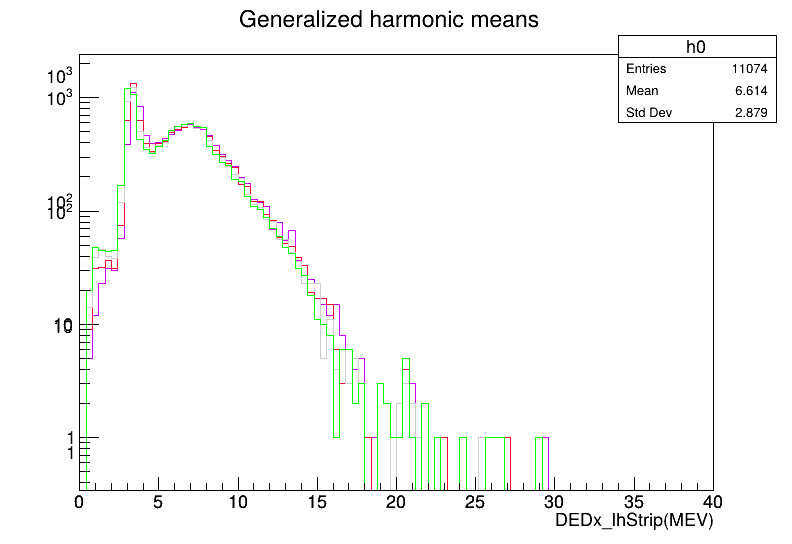

In [5]:
h2_stack = f.Get("h2_overlay")
c = f.Get("h2_canvas_overlay")

h2_stack.Draw("nostack")
c.Draw()

In [6]:
h2_stack = f.Get("h2_overlay")
h2_canvas = f.Get("h2_canvas_overlay")
h2_hist_list = h2_stack.GetHists()


h2_filtered_stack = f.Get("h2_filtered_overlay")
h2_filtered_canvas = f.Get("h2_filtered_canvas_overlay")
h2_filtered_hist_list = h2_filtered_stack.GetHists()


trunc_stack = f.Get("Trunc_overlay")
trunc_canvas = f.Get("Trunc_overlay_canvas")
trunc_hist_list = trunc_stack.GetHists()


trunc_filtered_stack = f.Get("Trunc_filtered_overlay")
trunc_filtered_canvas = f.Get("Trunc_filtered_overlay_canvas")
trunc_filtered_hist_list = trunc_filtered_stack.GetHists()

In [7]:
h_num = h2_hist_list.At(0)
h_den = h2_hist_list.At(2)

In [8]:
print(type(h_num))

<class cppyy.gbl.TH1D at 0x1ea0f250>


In [9]:
%jsroot on
drawer = utils.HistogramDrawer()
rp = drawer.create_two_ratio(h_num, h_den)
c = drawer.draw_ratio(rp, canvas_name="ratio", title="My Ratio", logy = True)
c.Draw()


Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 43 points have been skipped
